The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/mnt/c/Users/User/Dropbox/workspace/SEAT/python_src/pyseat_workspace/SEAT.py:529: RuntimeWarning: invalid value encountered in subtract
  delta_se_scores = se_scores[1:] - se_scores[:-1]
/mnt/c/Users/User/Dropbox/workspace/SEAT/python_src/pyseat_workspace/SEAT.py:529: RuntimeWarning: invalid value encountered in subtract
  delta_se_scores = se_scores[1:] - se_scores[:-1]
/mnt/c/Users/User/Dropbox/workspace/SEAT/python_src/pyseat_workspace/SEAT.py:529: RuntimeWarning: invalid value encountered in subtract
  delta_se_scores = se_scores[1:] - se_scores[:-1]
/mnt/c/Users/User/Dropbox/workspace/SEAT/python_src/pyseat_workspace/SEAT.py:529: RuntimeWarning: invalid value encountered in subtract
  delta_se_scores = se_scores[1:] - se_scores[:-1]
/mnt/c/Users/User/Dropbox/workspace/SEAT/python_src/pyseat_workspace/SEAT.py:529: RuntimeWarning: invalid value encountered in subtract
  delta_se_scores = se_scores[1:] - se_scores[:-1]


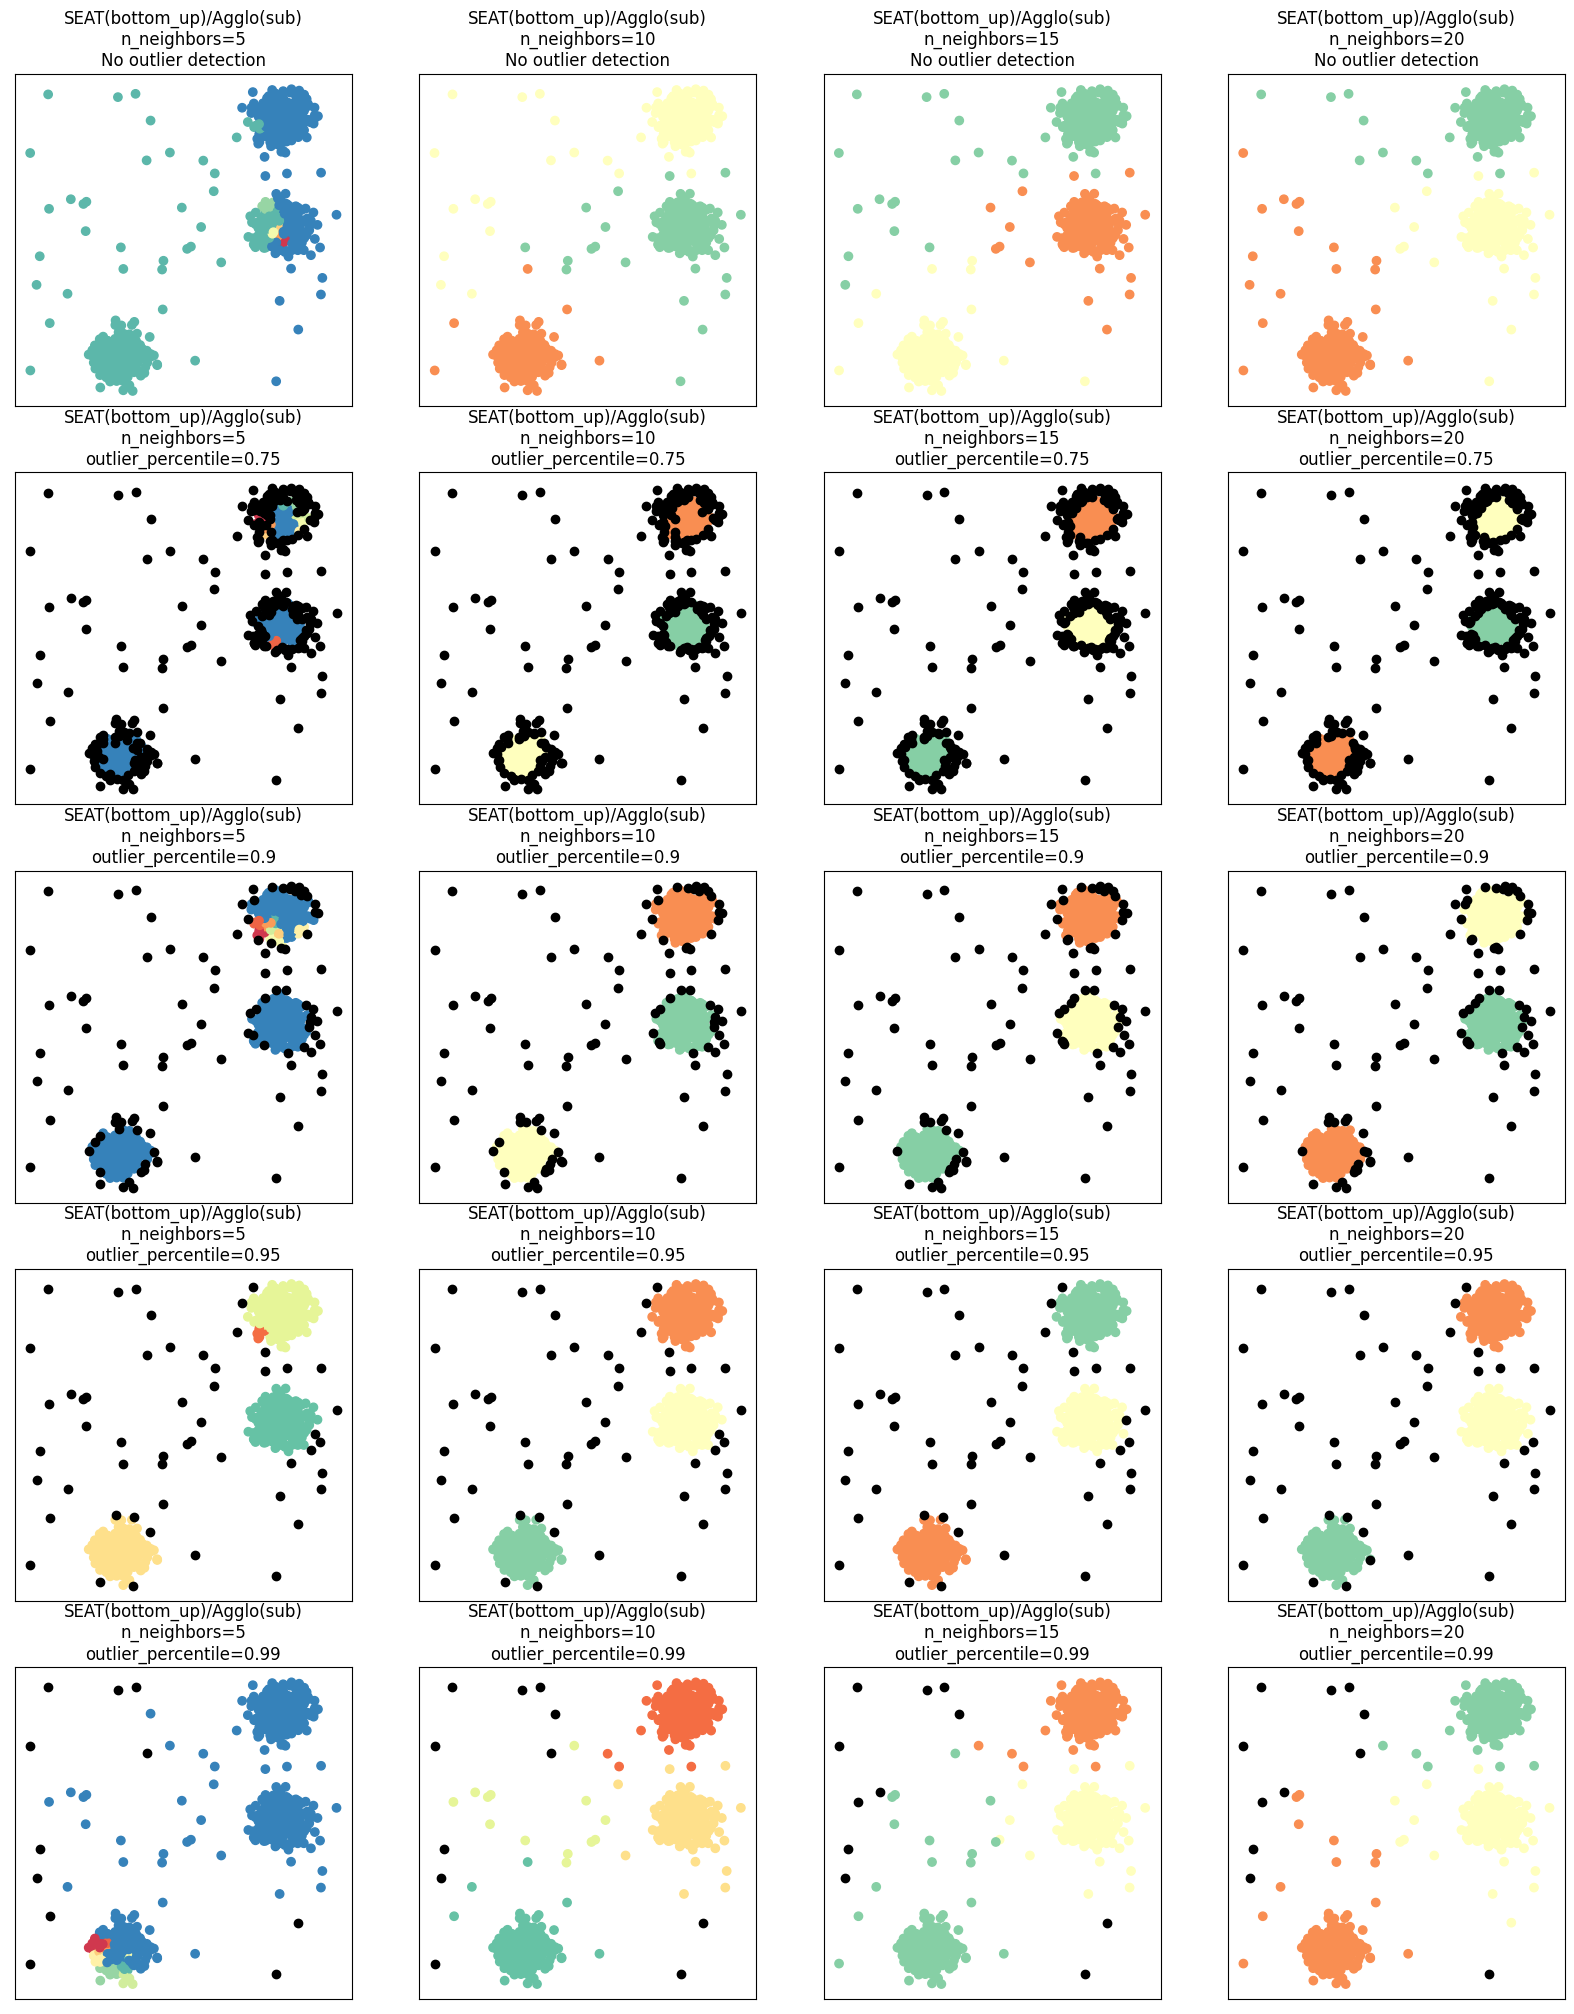

In [169]:
%load_ext autoreload
%autoreload 2

import time

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_blobs
from pyseat_workspace.SEAT import SEAT

# Example settings
n_samples = 1000
n_outliers = 50
random_state = 8

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X_outliers = np.random.RandomState(random_state).uniform(low=X.min(), high=X.max(), size=(n_outliers, 2))
X = np.concatenate([X, X_outliers], axis=0)
y = np.concatenate([y, np.array([-1]*n_outliers)])


n_row = 5
n_col = 4
fig_width = 5
plt.figure(figsize=(fig_width*n_col, fig_width*n_row))

for j, n_neighbors in enumerate([5, 10, 15, 20]):
    
    seat = SEAT(affinity="gaussian_kernel",
                sparsification="knn_neighbors",
                n_neighbors=n_neighbors,
                objective="SE",
                strategy="bottom_up")
    pred_y = seat.fit_predict(X)
    
    plt.subplot(n_row, n_col, j+1)
    plt.title('SEAT(bottom_up)/Agglo(sub)\nn_neighbors={}\nNo outlier detection'.format(n_neighbors))
    plt.scatter(X[:, 0], X[:, 1], c=pred_y,
                cmap=ListedColormap(sns.color_palette('Spectral', len(set(pred_y))))) 
    plt.xticks([])
    plt.yticks([])
    
    for i, outlier_percentile in enumerate([0.75, 0.90, 0.95, 0.99]):
        seat = SEAT(affinity="gaussian_kernel",
                    sparsification="knn_neighbors",
                    n_neighbors=n_neighbors,
                    objective="SE",
                strategy="bottom_up",
                outlier_detection="knn_neighbors",
                outlier_percentile=outlier_percentile)
        pred_y = seat.fit_predict(X)
        inlier_y = np.array(pred_y)[seat.inlier_index]
    
        plt.subplot(n_row, n_col, 4*(i+1)+j+1)
        plt.title('SEAT(bottom_up)/Agglo(sub)\nn_neighbors={}\noutlier_percentile={}'.format(n_neighbors, outlier_percentile))
        plt.scatter(X[seat.inlier_index, 0], X[seat.inlier_index, 1], c=inlier_y, 
                    cmap=ListedColormap(sns.color_palette('Spectral', len(set(inlier_y)))))   
        plt.scatter(X[seat.outlier_index, 0], X[seat.outlier_index, 1], c='black')     
        plt.xticks([])
        plt.yticks([])
plt.savefig('agglo_outlier_detection.png')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/mnt/c/Users/User/Dropbox/workspace/SEAT/python_src/pyseat_workspace/SEAT.py:529: RuntimeWarning: invalid value encountered in subtract
  delta_se_scores = se_scores[1:] - se_scores[:-1]
/mnt/c/Users/User/Dropbox/workspace/SEAT/python_src/pyseat_workspace/SEAT.py:529: RuntimeWarning: invalid value encountered in subtract
  delta_se_scores = se_scores[1:] - se_scores[:-1]
/mnt/c/Users/User/Dropbox/workspace/SEAT/python_src/pyseat_workspace/SEAT.py:529: RuntimeWarning: invalid value encountered in subtract
  delta_se_scores = se_scores[1:] - se_scores[:-1]
/mnt/c/Users/User/Dropbox/workspace/SEAT/python_src/pyseat_workspace/SEAT.py:529: RuntimeWarning: invalid value encountered in subtract
  delta_se_scores = se_scores[1:] - se_scores[:-1]


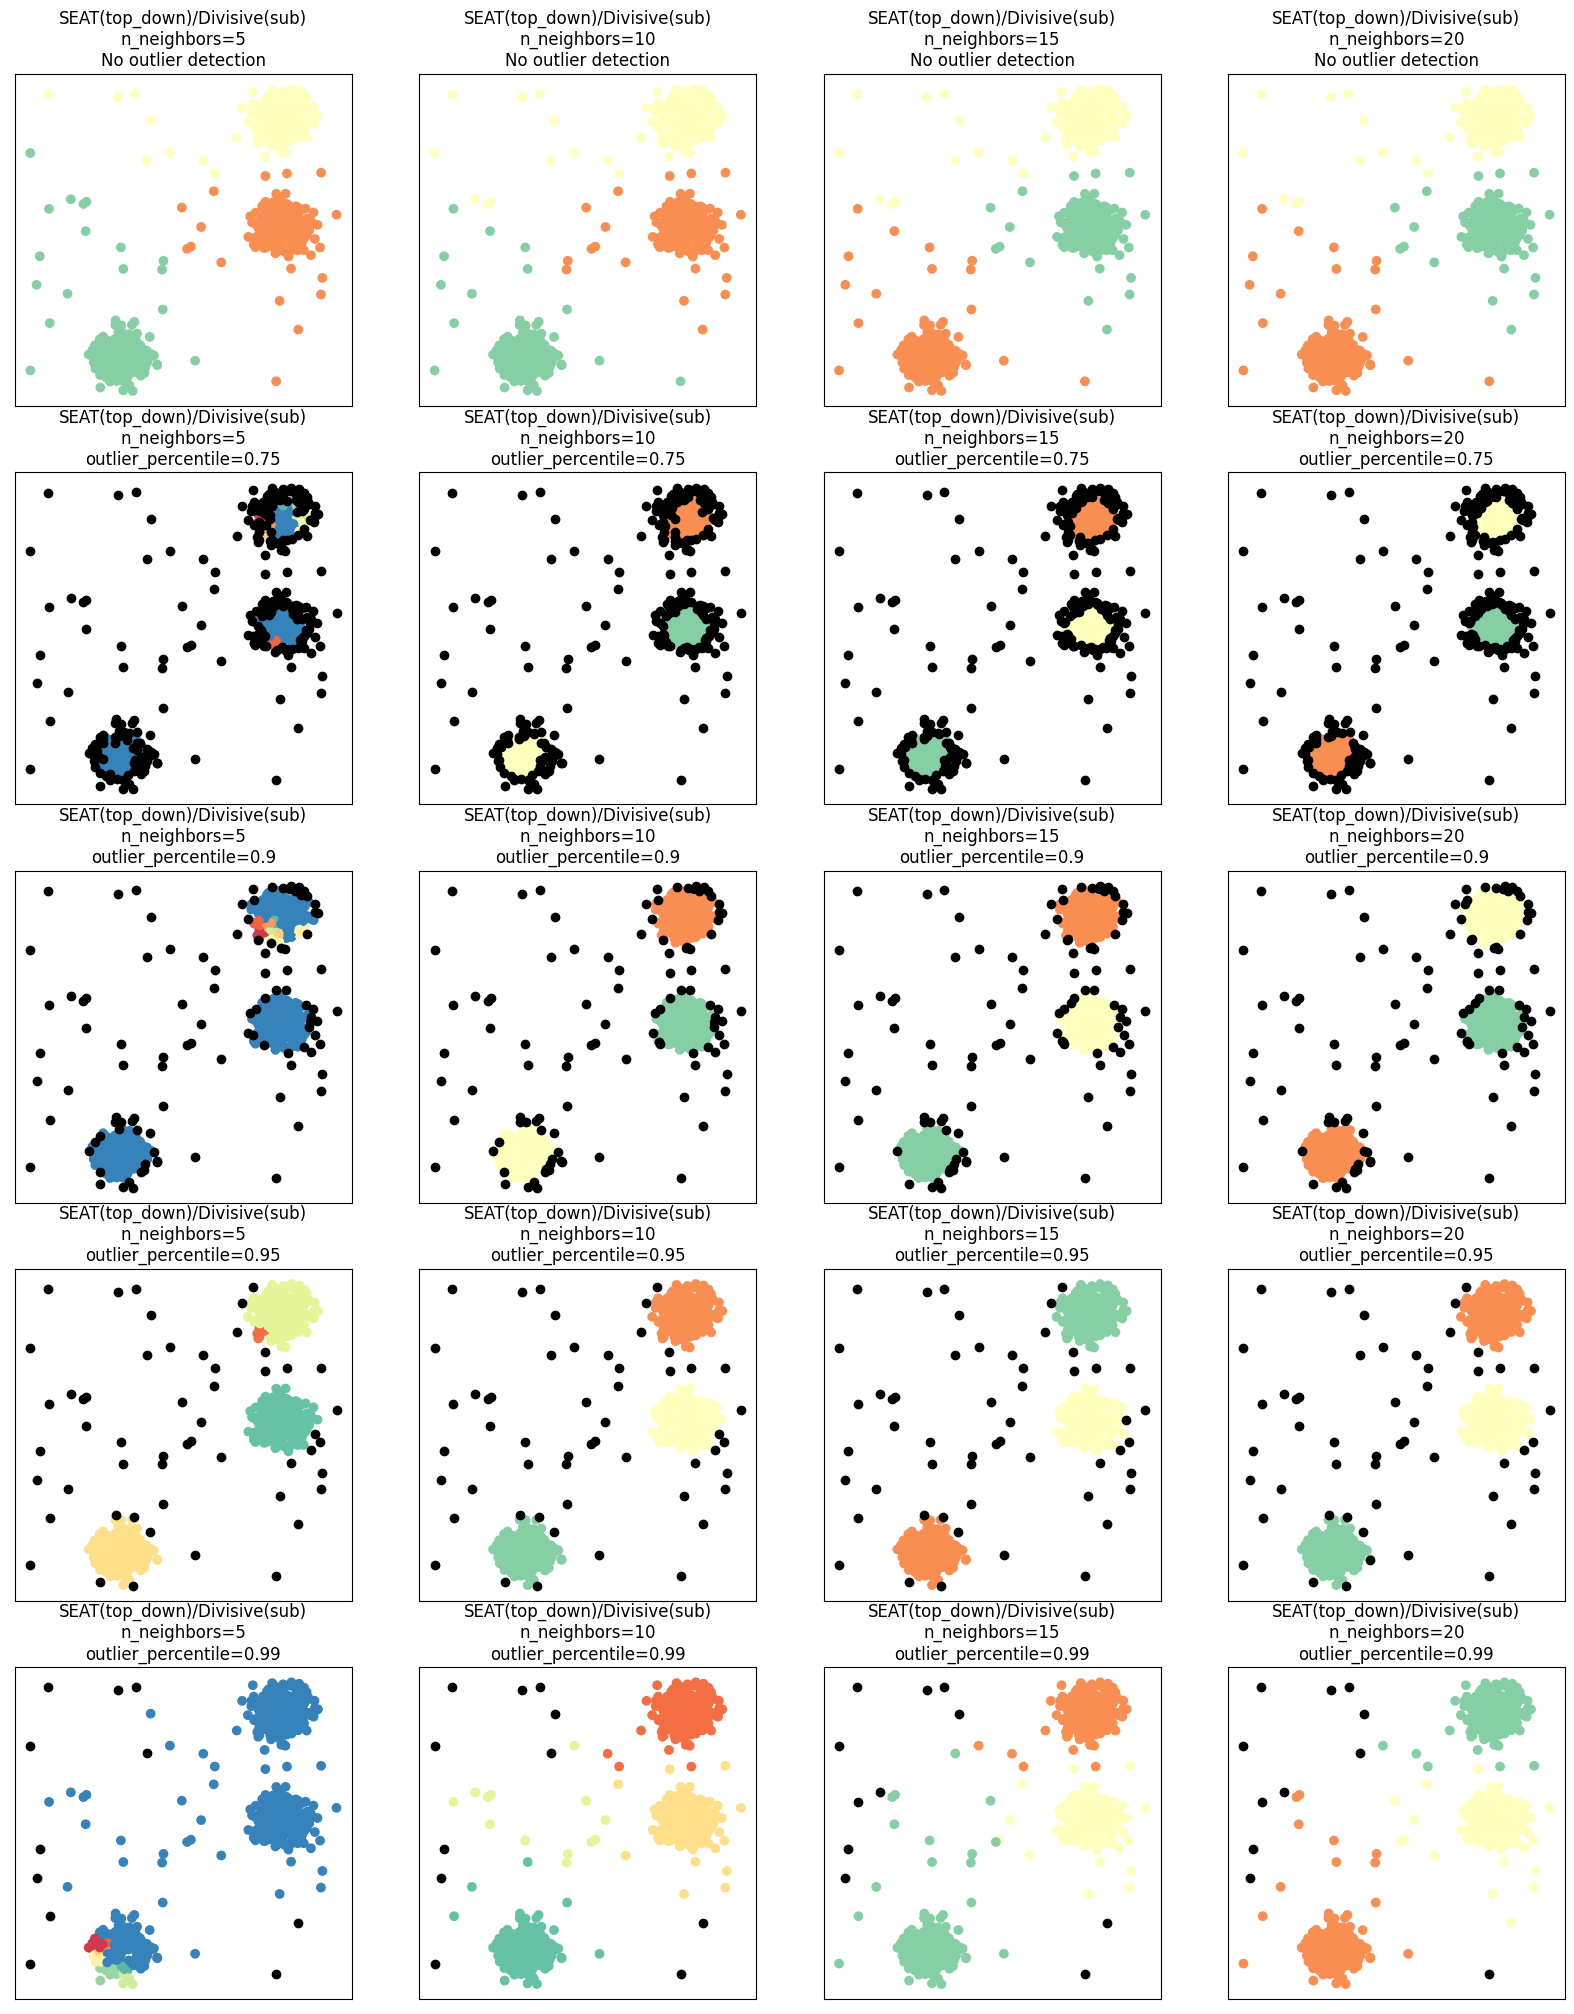

In [168]:
%load_ext autoreload
%autoreload 2

import time

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_blobs
from pyseat_workspace.SEAT import SEAT

# Example settings
n_samples = 1000
n_outliers = 50
random_state = 8

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X_outliers = np.random.RandomState(random_state).uniform(low=X.min(), high=X.max(), size=(n_outliers, 2))
X = np.concatenate([X, X_outliers], axis=0)
y = np.concatenate([y, np.array([-1]*n_outliers)])


n_row = 5
n_col = 4
fig_width = 5
plt.figure(figsize=(fig_width*n_col, fig_width*n_row))

for j, n_neighbors in enumerate([5, 10, 15, 20]):
    
    seat = SEAT(affinity="gaussian_kernel",
                sparsification="knn_neighbors",
                n_neighbors=n_neighbors,
                objective="SE",
                strategy="top_down")
    pred_y = seat.fit_predict(X)
    
    plt.subplot(n_row, n_col, j+1)
    plt.title('SEAT(top_down)/Divisive(sub)\nn_neighbors={}\nNo outlier detection'.format(n_neighbors))
    plt.scatter(X[:, 0], X[:, 1], c=pred_y,
                cmap=ListedColormap(sns.color_palette('Spectral', len(set(pred_y))))) 
    plt.xticks([])
    plt.yticks([])
    
    for i, outlier_percentile in enumerate([0.75, 0.90, 0.95, 0.99]):
        seat = SEAT(affinity="gaussian_kernel",
                    sparsification="knn_neighbors",
                    n_neighbors=n_neighbors,
                    objective="SE",
                strategy="bottom_up",
                outlier_detection="knn_neighbors",
                outlier_percentile=outlier_percentile)
        pred_y = seat.fit_predict(X)
        inlier_y = np.array(pred_y)[seat.inlier_index]
    
        plt.subplot(n_row, n_col, 4*(i+1)+j+1)
        plt.title('SEAT(top_down)/Divisive(sub)\nn_neighbors={}\noutlier_percentile={}'.format(n_neighbors, outlier_percentile))
        plt.scatter(X[seat.inlier_index, 0], X[seat.inlier_index, 1], c=inlier_y, 
                    cmap=ListedColormap(sns.color_palette('Spectral', len(set(inlier_y)))))   
        plt.scatter(X[seat.outlier_index, 0], X[seat.outlier_index, 1], c='black')     
        plt.xticks([])
        plt.yticks([])
plt.savefig('divisive_outlier_detection.png')